---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Applied Machine Learning: Module 4 (Supervised Learning, Part II)

## Preamble and Datasets

In [106]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# lets open fruits dataset into a dataframe
fruits = pd.read_table('assets/fruit_data_with_colors.txt')

# Lets make a list with the features that we are interested in using to classify
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

# Creates a new df containing only the 4 features previously chosen
X_fruits = fruits[feature_names_fruits]
# Creates a df containing the fruit_labels/classes of the fruits in the main df fruits
y_fruits = fruits['fruit_label']

# Creates list with the four classes of fruits in the main df
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

# Lets choose only two features and put them in two new dfs, one containing the features and other with the classes labels
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']



In [107]:
# Lets print the X_fruits_2D and join it with the fruits labels and names just to check the data
X_fruits_2d.join(fruits[["fruit_label","fruit_name"]]).head(15)

,height,width,fruit_label,fruit_name
0,7.3,8.4,1,apple
1,6.8,8.0,1,apple
2,7.2,7.4,1,apple
3,4.7,6.2,2,mandarin
4,4.6,6.0,2,mandarin
5,4.3,5.8,2,mandarin
6,4.3,5.9,2,mandarin
7,4.0,5.8,2,mandarin
8,7.8,7.1,1,apple
9,7.0,7.4,1,apple


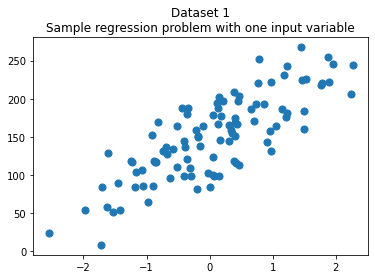

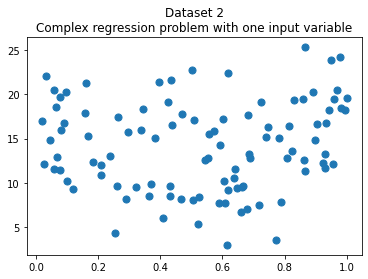

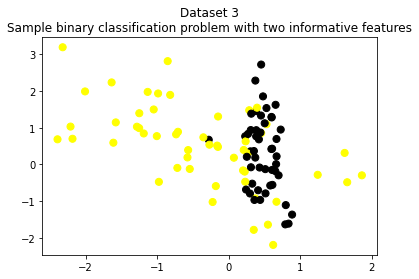

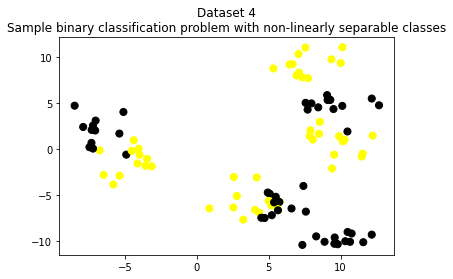

In [108]:
# Here some artificial datapoints will be created

# Dataset 1
# Generate a random regression problem and graph the data
from sklearn.datasets import make_regression
plt.figure()
plt.title('Dataset 1\nSample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# Dataset 2
# synthetic dataset for more complex regression, generate the “Friedman #1” regression problem and graph the data
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Dataset 2\nComplex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

#Dataset 3
# synthetic dataset for classification (binary) and graph
plt.figure()
plt.title('Dataset 3\nSample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# Dataset 4
# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Dataset 4\nSample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [109]:
# Lets load two real datasets

from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

In [110]:
# We can see that in cancer dataset there are 569 instances with 30 features each
X_cancer.shape

(569, 30)

In [111]:
# Cancer dataset has 569 labels
y_cancer.shape

(569,)

In [112]:
# y_cancer has only two types of labels: 0´s or 1's
np.unique(y_cancer)

array([0, 1])

## Naive Bayes classifiers:
### Lets use this classifier in the generated data

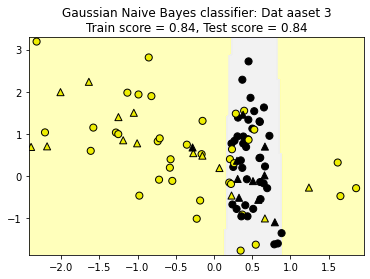

In [113]:
# Lets use artificial dataset 3 with Naive Bayes classifier

from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

# From the dataset 3 lets create X,y train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

# Creates Bayes classifier and trains it with train dataset
nbclf = GaussianNB().fit(X_train, y_train)

# Graphs classifier boundaries, calculates and shows Train and test scores
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dat aaset 3')

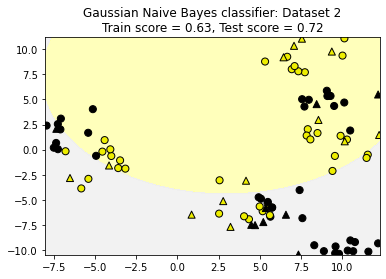

In [114]:
# Lets use artificial dataset 4 with Naive Bayes classifier

# From the dataset 3 lets create X,y train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

# Creates Bayes classifier and trains it with train dataset
nbclf = GaussianNB().fit(X_train, y_train)

# Graphs classifier boundaries, calculates and shows Train and test scores
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 2')

### Now lets use Bayes in real-world dataset

In [115]:
# Lets use breast cancer data set with Naive Bayes classifier

# Split data in train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))


# We can see that Naibe Bayes has a good performance in both train and test sets despite using little computing power

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


## Ensembles of Decision Trees

### Random forests with artificia data

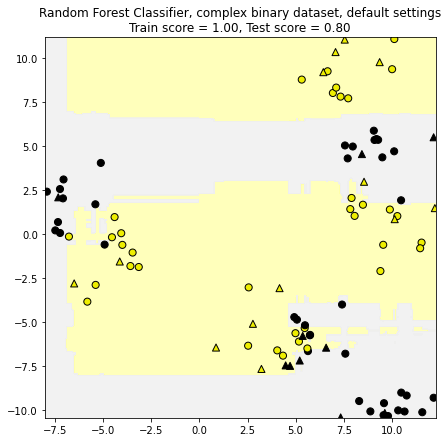

In [116]:
# Lets use Random Forest with the artificial dataset 4

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 7))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

### Random forest with the Fruit dataset and its 4 features

In [117]:
X_fruits.shape

#We can see the dataset has 59 instances with 4 features each

(59, 4)

In [118]:
y_fruits.shape

(59,)

In [119]:
y_fruits.unique()
# We can see the labels of the fruits

array([1, 2, 3, 4])

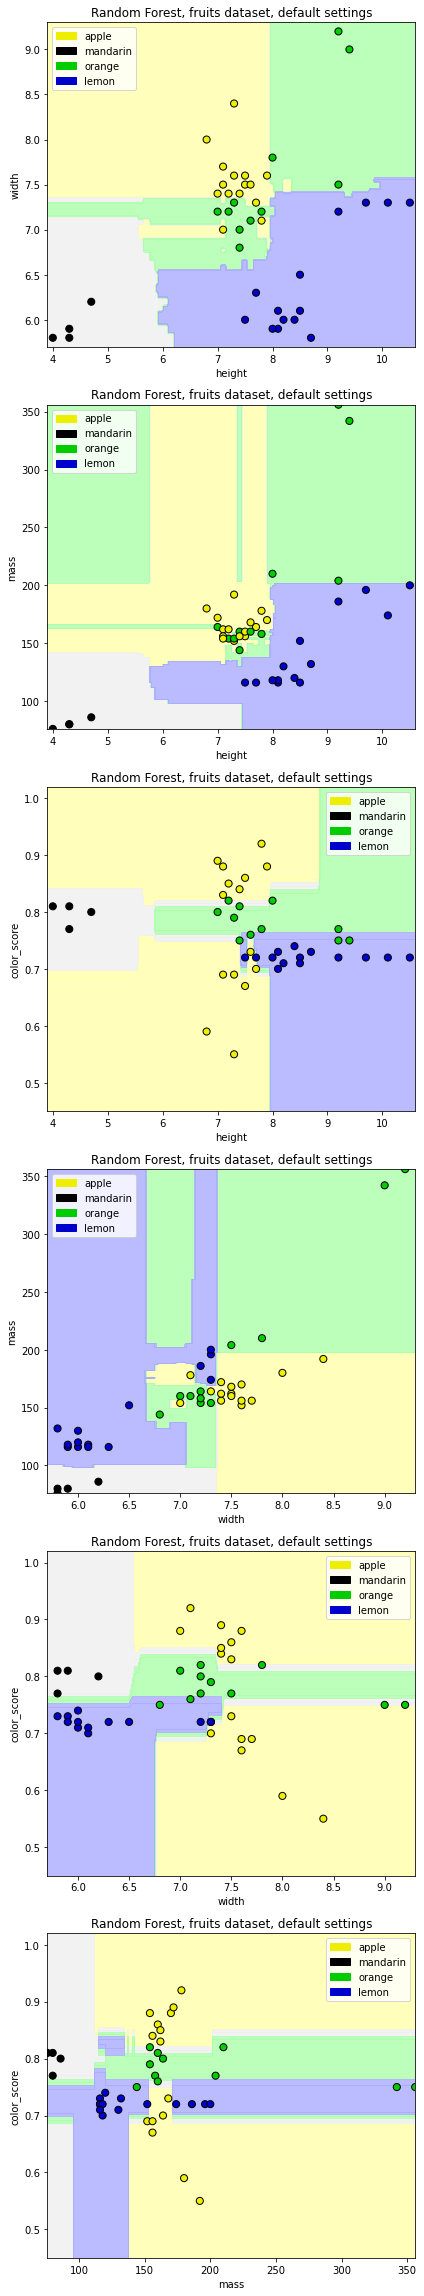

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

# Splits data in train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_fruits.values,
                                                   y_fruits.values,
                                                   random_state = 0)
# Creates fig with 6 rows and 1 column
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))


# Makes a figure and iterates through all the possible pair combinations available in the 4 features
# For each of the 6 pair of features we will graph the features and the use Random Forest classifier to draw the decision boundaries
# Defines a few variables to be used
title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

# Here iterates each of the 6 possible pair of features
for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair] # defines X by seecting all the instances and a pair of columns/features
    y = y_train
    
    # Creates the classifier and trains it
    clf = RandomForestClassifier().fit(X, y)

    # Plots the 2 features and the classification boundaries
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    # Selects the title of the axis based on the numbers inside pair and refers to feature_names_fruits
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

# Lets see the decision boundaries provided by the classifier

In [121]:
# Lets see the scores of the RandomForestClassifier

# with n_estimator we choose to create ten randomized decision trees

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


#### Random Forests on a real-world dataset = Cancer dataset with 30 features and 569 instances

In [122]:
X_cancer.shape

(569, 30)

In [123]:
y_cancer.shape

(569,)

In [124]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

# Creates Random Forest classifier and will create 100 random Trees, each tree will select randomly 8 of the 30 available features
clf = RandomForestClassifier(n_estimators=100, max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

# We can see that with little tunning and very quicky, the classifier performs well in the dataset

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.97


### Gradient-boosted decision trees

#### Gradient boosted decision trees on the dat

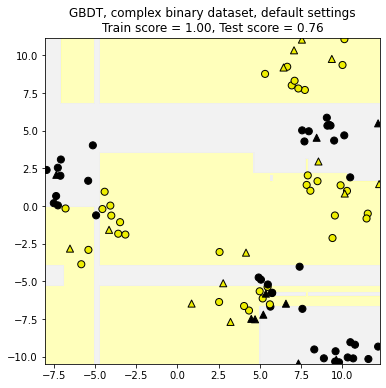

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

#### Gradient boosted decision trees on the fruit dataset

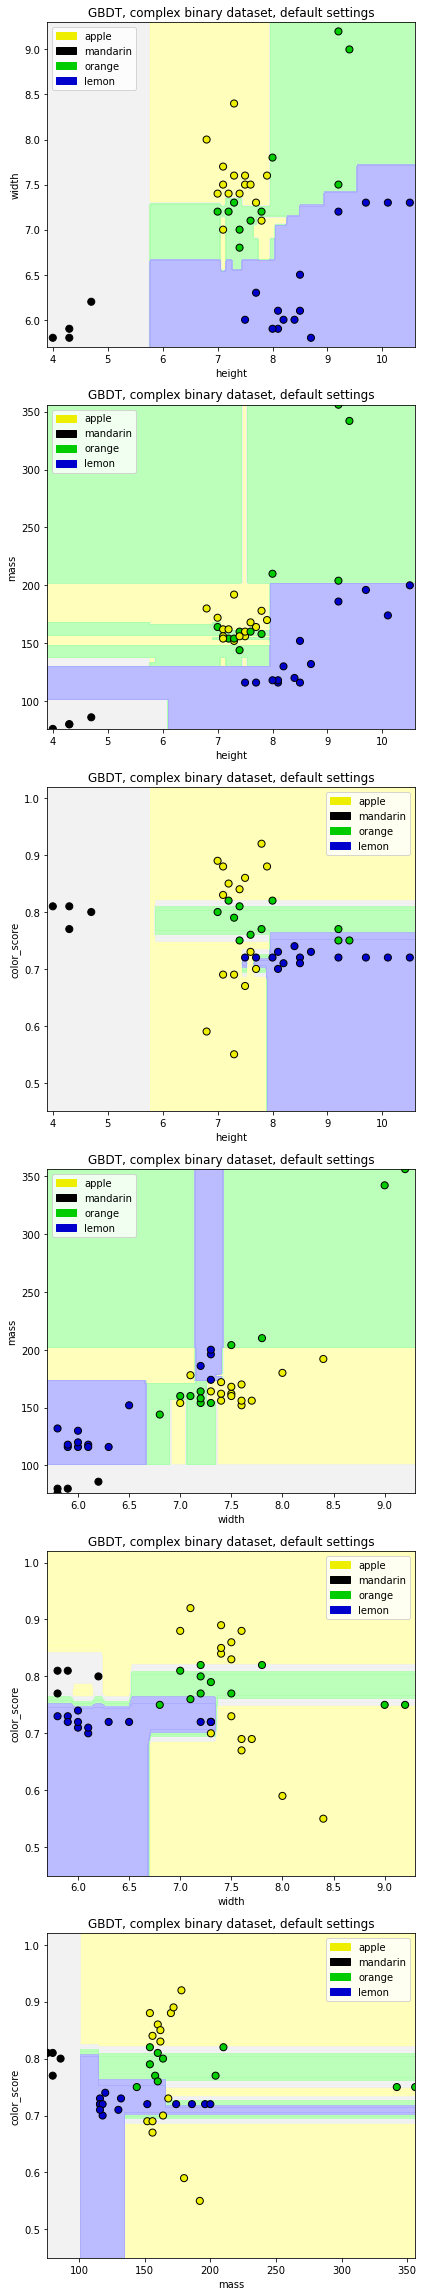

In [126]:
# Splits data in train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X_fruits.values,
                                                   y_fruits.values,
                                                   random_state = 0)

# Creates fig and 6 subaxes
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

# Creates a list of list to choose 2 columns from the datasets and iterate over all the features
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

# Iteration by pairs over all the possible features combinations
for pair, axis in zip(pair_list, subaxes):
    # Chooses all the instances and a pair of features from the pair_list
    X = X_train[:, pair]
    y = y_train
    
    # Creates and train the model to later plot the decision regions and boundaries
    clf = GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    # Defines the name of the axis
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()


In [127]:
# lets calculate the train and test scores for this model
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


#### Gradient-boosted decision trees on a real-world dataset = Cancer dataset

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

# We generate two different Gradient Boosting Classifiers


## First classifier uses the DEFAULT SETINGS
clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('First Classifier = complex model with Default settings')
print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))


## Second classifier with less complexity
## uses 10x lower learning_rate to reduce complexity of the model and 33% smaller max_depth for each of the trees in the series
## less learning_rate puts less enphasis in correcting the mistakes of it´s predecesor.
clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Second Classifier = less complex model')
print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

First Classifier = complex model with Default settings
Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.96

Second Classifier = less complex model
Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


We can see that the first model has 100% accuracy with the training set, so it probably over fits
So in the second model we modified parameters to reduce the coplexity of the model, improving the test accuracy en making better generalizations

## Neural networks

#### Activation functions
We can see the different types of activation functions that can be applied to generate the hidden layer = relu, tanh or logistic

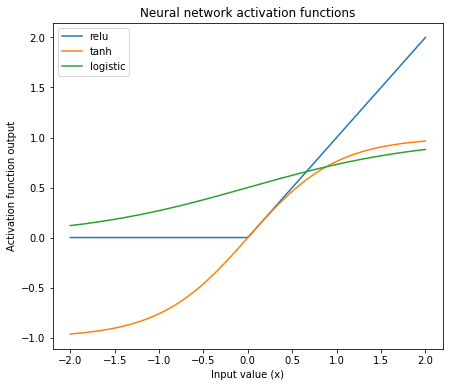

In [129]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

### Neural networks: Classification using Multilayer Perceptron (MLP) with one Hidden Layer

#### Synthetic dataset 1: single hidden layer

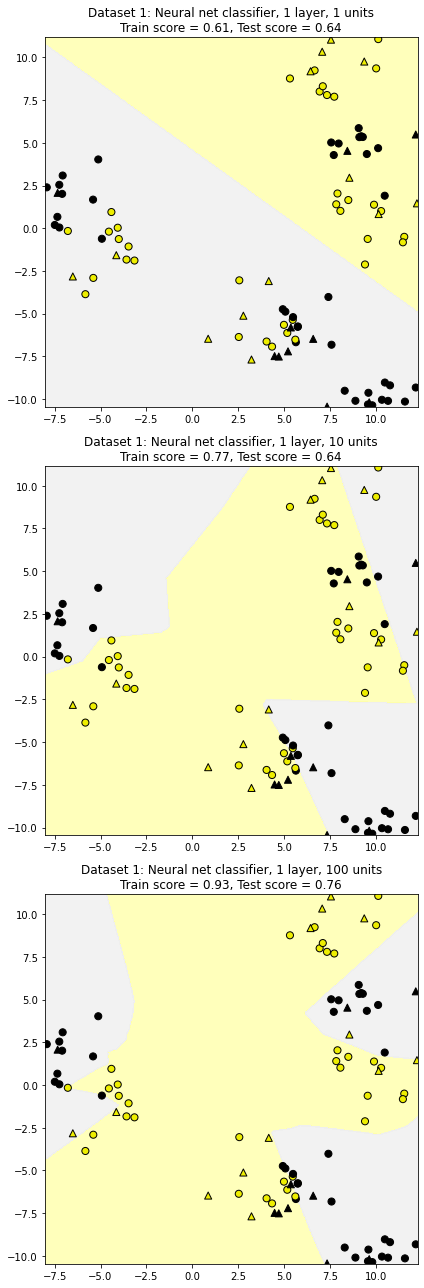

In [130]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

# Here we calculate 3 MLP classifiers, each of them with ONE HIDDEN layer, an each layer with 3 different Hidden Units: 1, 10 or 100
# the parameter " hidden_layer_sizes" takes a list with one value for each hidden layer, so, a list with one number = one hidden layer
for units, axis in zip([1, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

We can see that using one later with different numbers of hidden units each, increases the complexity of the model and its accuracy.
The test score is still not goot enough with one hidden layer, it reaches 76% in the test set.

With 1 layer and 1 hidden unit with can see that the MLPClassifier behaves like a logistic classifier
With 1 layer and 10 hidden units, now behaves like a non linear classifier
With 1 layer and 100 the decision boundaries are even more complex and accurate

#### Synthetic dataset 1: two hidden layers

Number of layers = [10]


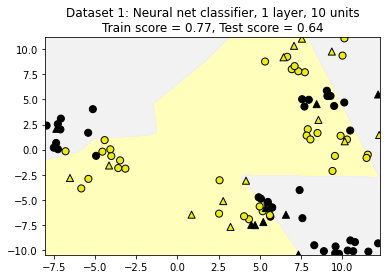

Number of layers = [10, 10]


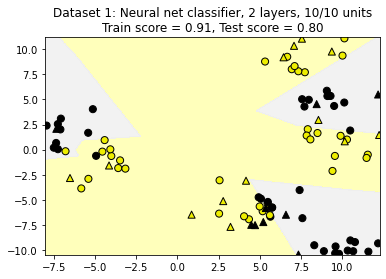

In [131]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

layers = [[10], [10,10]]
titles = ['Dataset 1: Neural net classifier, 1 layer, 10 units','Dataset 1: Neural net classifier, 2 layers, 10/10 units']


for layer,title in zip(layers,titles):
    print("Number of layers =", layer)
    nnclf = MLPClassifier(hidden_layer_sizes = layer, solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

    plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 title)

We can see that 2 hidden layer has a more complex boundaries

#### Regularization parameter: alpha
It applies an L2 regularization like in linear models
It penalizes big weights and tries that all weights are close to zero
The objective is that bigger alphas simplify the model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

# Lets try different values of alpha, from smaller to bigger
# We generate 4 models with different values of alpha and 2 hidden layers with 100 hidden units each
for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    

Results:

alpha 0.01 and less penalization
- the decision boundaries are complex. 
- model overfits with high score for train and low for test.

alpha 0.05 and more penalization
- the decision boundaries are smoother. 
- captures the global structure of data. 
- Generalizes better with a better test score

#### The effect of different choices of activation functions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = this_activation,
                         alpha = 0.1, hidden_layer_sizes = [10, 10],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

We can see how different activation functions affect the accuracy of the classification score

In this case tanh has the best accuracy of all three

# Features Normalization:

## It can be critical to normalize the input features in Neural networks as well as in support vectors machines...


#### Application to real-world dataset for classification

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

# Creates train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

## Lets pre-process the input features with a normalización
# Crates de scaler object
scaler = MinMaxScaler()

# Finds max and mins from the train dataset and transforms the features using the found range
X_train_scaled = scaler.fit_transform(X_train)
# ATTENTION #
# Transforms the test dataset based on the range found (OR FITTED) in the train dataset the previous step!!!!!!
X_test_scaled = scaler.transform(X_test)

# Creates MLP classifier with two hidden layers with 100 hidden units each, also some L2 normalization is added with the alpha parameter
clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs')
# Trains the classifier with the train dataset
clf.fit(X_train_scaled, y_train)

# Computes the scores
print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

# Neural networks can be used as classifiers but also as regressors
### Neural networks: Regression

In [ ]:
from sklearn.neural_network import MLPRegressor

# Creates test and train datasets from the artificial dataset nr. 1
# It does not use the total amount of instances, it slices the dataset with a jumping step of 5, so it slices one element every five.
# This generates a reduction of the original dataset
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

# Creates a figure with 6 subaxes in a disposition of 2x3 grid of Axes
fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

# Lets create values to predict. These values range from -3 to 3
X_predict_input = np.linspace(-3, 3, 50)
# These values should be arranged as 1 column with 50 rows (50x1) to be predicted, so lets reshape them
# With -1 we define a wild card to create as many rows as necessary, and with 1 we define that we desire 1 column
X_predict_input = X_predict_input.reshape(-1,1)

# Iterates over 2 different activation functions and 3 levels of regularization alpha:
# it creates 6 axes, one for each combination
for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        # Predicts each value for the inputs
        y_predict_output = mlpreg.predict(X_predict_input)
        
        # Plots original values from the dataset with circles: the train and test values
        thisaxis.plot(X_train, y_train, 'o')
        # Plots the predicted values with triangles: predicted values for the input values of our interest
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        
       
        # Defines different aspects of the axes: axis min and max, axis x and y labels and axes titles
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

In blue we can see the true values of the dataset, and in orange the predictions of each model.
With more alpha, the predictions are less accurate but the models are simpler


In [ ]:
º